In [12]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.evaluation import evaluate_policy

import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

from finta import TA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("gmedata.csv")
df ["Date"] = pd.to_datetime(df["Date"])

In [4]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

Date  Open  High   Low  Close     Volume
250 2020-03-16  3.93  4.57  3.90   4.37  4,866,696
249 2020-03-17  4.40  4.65  4.11   4.23  3,562,210
248 2020-03-18  4.10  4.25  3.50   3.77  3,651,709
247 2020-03-19  3.71  4.20  3.55   4.19  5,039,539
246 2020-03-20  4.08  4.08  3.65   3.76  7,722,194

In [5]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [6]:
env.signal_features

array([[ 4.3700e+00,  0.0000e+00],
       [ 4.2300e+00, -1.4000e-01],
       [ 3.7700e+00, -4.6000e-01],
       [ 4.1900e+00,  4.2000e-01],
       [ 3.7600e+00, -4.3000e-01],
       [ 3.8100e+00,  5.0000e-02],
       [ 4.1600e+00,  3.5000e-01],
       [ 4.1700e+00,  1.0000e-02],
       [ 4.4100e+00,  2.4000e-01],
       [ 4.2200e+00, -1.9000e-01],
       [ 3.6500e+00, -5.7000e-01],
       [ 3.5000e+00, -1.5000e-01],
       [ 3.2500e+00, -2.5000e-01],
       [ 2.8500e+00, -4.0000e-01],
       [ 2.8000e+00, -5.0000e-02],
       [ 3.0900e+00,  2.9000e-01],
       [ 3.2700e+00,  1.8000e-01],
       [ 3.4100e+00,  1.4000e-01],
       [ 3.8900e+00,  4.8000e-01],
       [ 4.7400e+00,  8.5000e-01],
       [ 5.9500e+00,  1.2100e+00],
       [ 5.2700e+00, -6.8000e-01],
       [ 5.0300e+00, -2.4000e-01],
       [ 4.8800e+00, -1.5000e-01],
       [ 5.6100e+00,  7.3000e-01],
       [ 4.7800e+00, -8.3000e-01],
       [ 4.8900e+00,  1.1000e-01],
       [ 4.7000e+00, -1.9000e-01],
       [ 4.7700e+00,

In [7]:
env.action_space

Discrete(2)

info {'total_reward': 337.69000000000005, 'total_profit': 6.376301249180511, 'position': 0}


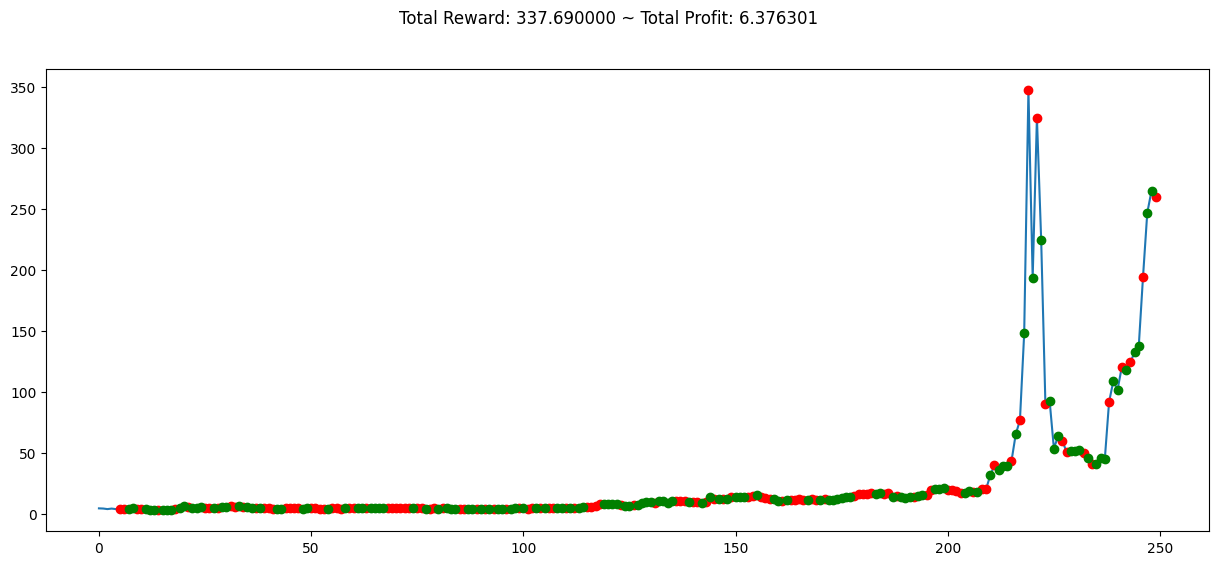

In [8]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [9]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [10]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [13]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [14]:
df.head(15)


Date  Open  High   Low  Close     Volume       SMA        RSI  \
250 2020-03-16  3.93  4.57  3.90   4.37  4866696.0  0.000000   0.000000   
249 2020-03-17  4.40  4.65  4.11   4.23  3562210.0  0.000000   0.000000   
248 2020-03-18  4.10  4.25  3.50   3.77  3651709.0  0.000000   0.000000   
247 2020-03-19  3.71  4.20  3.55   4.19  5039539.0  0.000000  43.394834   
246 2020-03-20  4.08  4.08  3.65   3.76  7722194.0  0.000000  29.351457   
245 2020-03-23  3.58  3.86  3.50   3.81  6009784.0  0.000000  32.102964   
244 2020-03-24  3.95  4.21  3.89   4.16  6805659.0  0.000000  47.512950   
243 2020-03-25  4.15  4.49  4.04   4.17  3592059.0  0.000000  47.876947   
242 2020-03-26  4.24  4.71  4.24   4.41  6210979.0  0.000000  55.799557   
241 2020-03-27  4.94  5.09  4.15   4.22  7024763.0  0.000000  49.398141   
240 2020-03-30  4.22  4.27  3.65   3.65  3350571.0  0.000000  36.040223   
239 2020-03-31  3.63  3.80  3.50   3.50  2304132.0  4.020000  33.474865   
238 2020-04-01  3.45  3.49  3.12   3.25  4568695.0  3.926667  29.682621   
237 2020-04-02  3.26  3.35  2.85   2.85  4064339.0  3.811667  24.834835   
236 2020-04-03  2.85  2.94  2.57   2.80  3830761.0  3.730833  24.300576   

            OBV  
250         0.0  
249  -3562210.0  
248  -7213919.0  
247  -2174380.0  
246  -9896574.0  
245  -3886790.0  
244   2918869.0  
243   6510928.0  
242  12721907.0  
241   5697144.0  
240   2346573.0  
239     42441.0  
238  -4526254.0  
237  -8590593.0  
236 -12421354.0

In [15]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [16]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [17]:
env2.signal_features


array([[ 3.90000000e+00,  4.86669600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.11000000e+00,  3.56221000e+06,  0.00000000e+00,
         0.00000000e+00, -3.56221000e+06],
       [ 3.50000000e+00,  3.65170900e+06,  0.00000000e+00,
         0.00000000e+00, -7.21391900e+06],
       [ 3.55000000e+00,  5.03953900e+06,  0.00000000e+00,
         4.33948339e+01, -2.17438000e+06],
       [ 3.65000000e+00,  7.72219400e+06,  0.00000000e+00,
         2.93514572e+01, -9.89657400e+06],
       [ 3.50000000e+00,  6.00978400e+06,  0.00000000e+00,
         3.21029638e+01, -3.88679000e+06],
       [ 3.89000000e+00,  6.80565900e+06,  0.00000000e+00,
         4.75129499e+01,  2.91886900e+06],
       [ 4.04000000e+00,  3.59205900e+06,  0.00000000e+00,
         4.78769470e+01,  6.51092800e+06],
       [ 4.24000000e+00,  6.21097900e+06,  0.00000000e+00,
         5.57995572e+01,  1.27219070e+07],
       [ 4.15000000e+00,  7.02476300e+06,  0.00000000e+00,
         4.93981406e+01

In [18]:
df.head()


Date  Open  High   Low  Close     Volume  SMA        RSI        OBV
250 2020-03-16  3.93  4.57  3.90   4.37  4866696.0  0.0   0.000000        0.0
249 2020-03-17  4.40  4.65  4.11   4.23  3562210.0  0.0   0.000000 -3562210.0
248 2020-03-18  4.10  4.25  3.50   3.77  3651709.0  0.0   0.000000 -7213919.0
247 2020-03-19  3.71  4.20  3.55   4.19  5039539.0  0.0  43.394834 -2174380.0
246 2020-03-20  4.08  4.08  3.65   3.76  7722194.0  0.0  29.351457 -9896574.0

In [19]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [20]:
model = RecurrentPPO('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2684 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 128  |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 256         |
| train/                  |             |
|    approx_kl            | 0.000381961 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.693      |
|    explained_variance   | 0.216       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0664      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00335    |
|    value_loss           | 0.225       |
-----------------------------------------
-----------------

In [21]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1.0300000000000007, 'total_profit': 1.0667220298886109, 'position': 0}


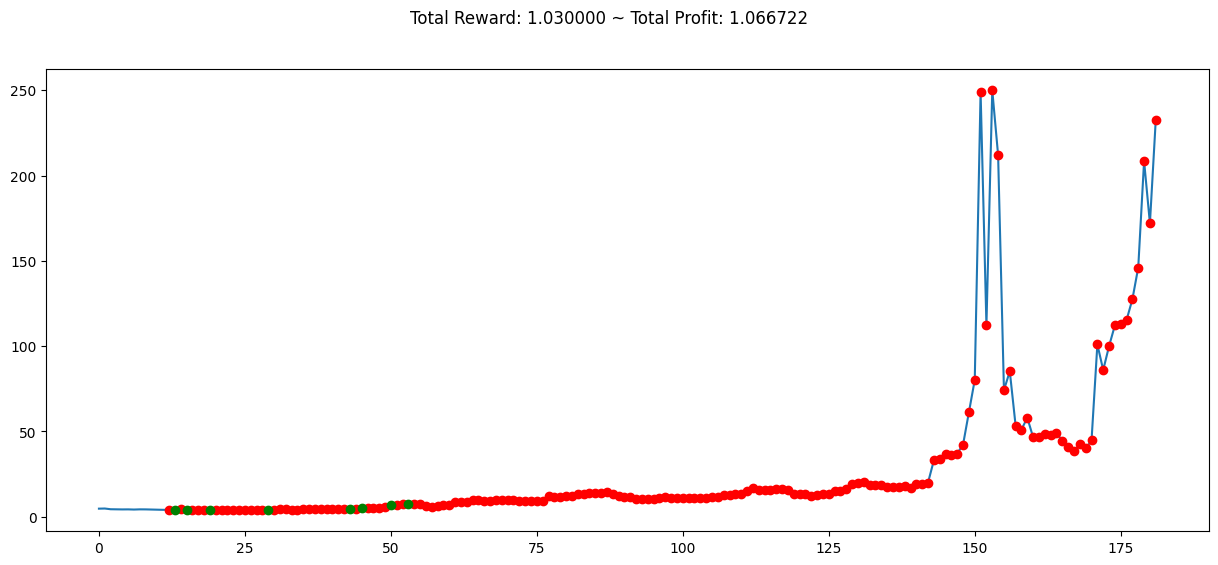

In [22]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [23]:
df.set_index("Date", inplace=True)
df.head()

Open  High   Low  Close     Volume  SMA        RSI        OBV
Date                                                                     
2020-03-16  3.93  4.57  3.90   4.37  4866696.0  0.0   0.000000        0.0
2020-03-17  4.40  4.65  4.11   4.23  3562210.0  0.0   0.000000 -3562210.0
2020-03-18  4.10  4.25  3.50   3.77  3651709.0  0.0   0.000000 -7213919.0
2020-03-19  3.71  4.20  3.55   4.19  5039539.0  0.0  43.394834 -2174380.0
2020-03-20  4.08  4.08  3.65   3.76  7722194.0  0.0  29.351457 -9896574.0

In [24]:
env.prices

array([  4.72,   4.8 ,   4.38,   4.3 ,   4.27,   4.3 ,   4.2 ,   4.31,
         4.29,   4.19,   4.06,   4.03,   4.13,   4.18,   4.26,   4.07,
         4.13,   4.09,   3.94,   3.77,   3.88,   3.92,   4.06,   4.01,
         3.95,   3.92,   3.92,   3.97,   3.99,   4.  ,   4.13,   4.25,
         4.38,   4.06,   4.18,   4.34,   4.36,   4.5 ,   4.55,   4.56,
         4.44,   4.64,   4.51,   4.6 ,   4.56,   4.88,   4.92,   5.02,
         5.22,   5.69,   6.77,   7.11,   7.24,   7.17,   7.48,   7.31,
         6.19,   5.87,   6.43,   6.69,   7.03,   8.41,   8.91,   8.38,
         9.9 ,   9.92,   9.01,   9.1 ,   9.55,   9.93,  10.06,   9.69,
         9.3 ,   9.25,   9.1 ,   9.17,   9.19,  11.9 ,  11.4 ,  11.65,
        12.05,  11.99,  13.08,  13.38,  13.67,  13.8 ,  14.19,  14.55,
        13.26,  12.36,  11.78,  11.68,  10.36,  10.5 ,  10.63,  10.61,
        11.06,  11.32,  11.25,  10.83,  11.21,  10.97,  11.  ,  10.72,
        11.23,  11.56,  11.45,  12.54,  12.67,  13.3 ,  13.42,  14.88,
      

info {'total_reward': 378.6, 'total_profit': 24.553984257367254, 'position': 1}


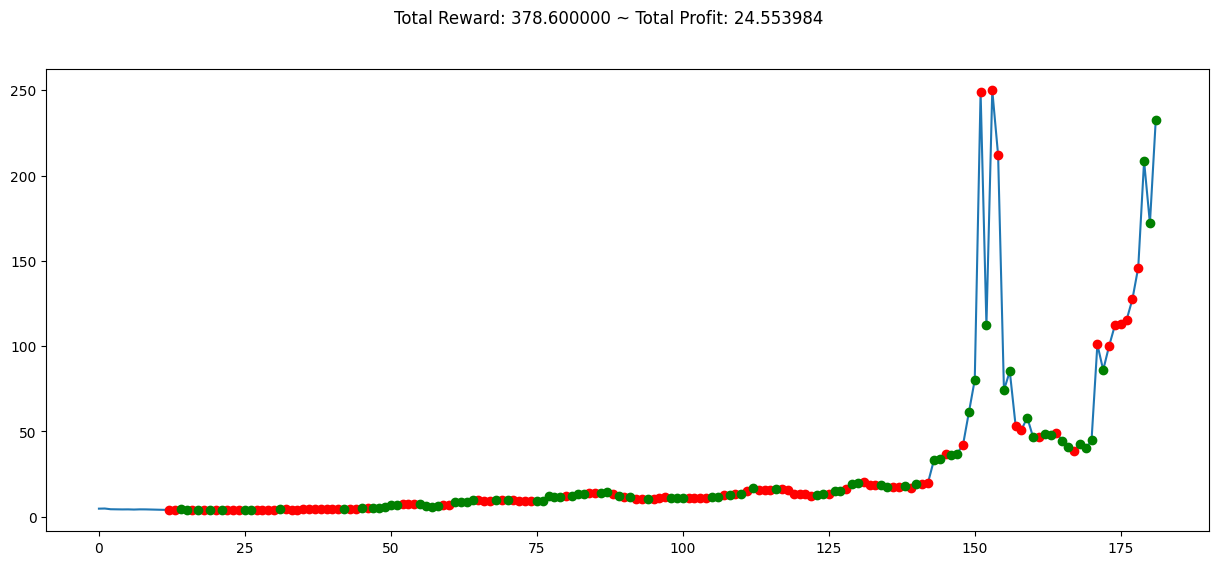

In [25]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [26]:
env.action_space

Discrete(2)

In [27]:
env_maker =  lambda: gym.make("stocks-v0", df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])